# GRIPFEB'21: THE SPARKS FOUNDATION

## Data Science & Business Analytics Intern¶

## Task-5:Exploratory Data Analysis on dataset 'Indian Premier League'

### Name: Simina Mannan Trisha

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#load the match dataset
match=pd.read_csv('matches.csv')
match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#load the deliver dataset
deliver=pd.read_csv('deliveries.csv')
deliver.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
match.shape #shape of the match dataset

(756, 18)

In [5]:
deliver.shape #shape of the deliver dataset

(179078, 21)

In [6]:
match.info() #info of the match dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliver.info() #info of the deliver dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
match.isnull().sum() #summation the null values of match dataset

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
deliver.isnull().sum() #summation of the null values of deliver dataset

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
match.nunique() #unique values of match datastet

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [11]:
deliver.nunique() #unique values of deliver dataset

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

### Merging of this two datasets

In [12]:
df=pd.merge(deliver,match,left_on='match_id',right_on='id')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [13]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Data visualization

#### Number of matches played in each season

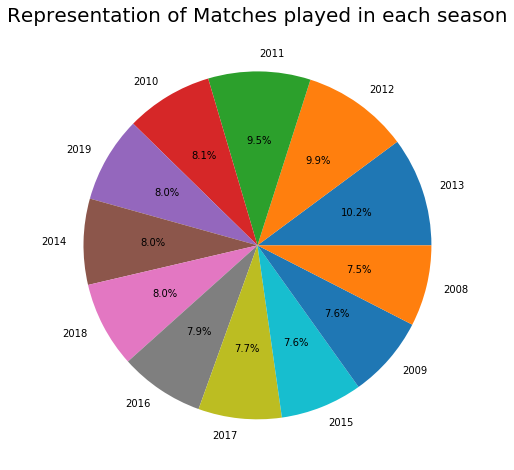

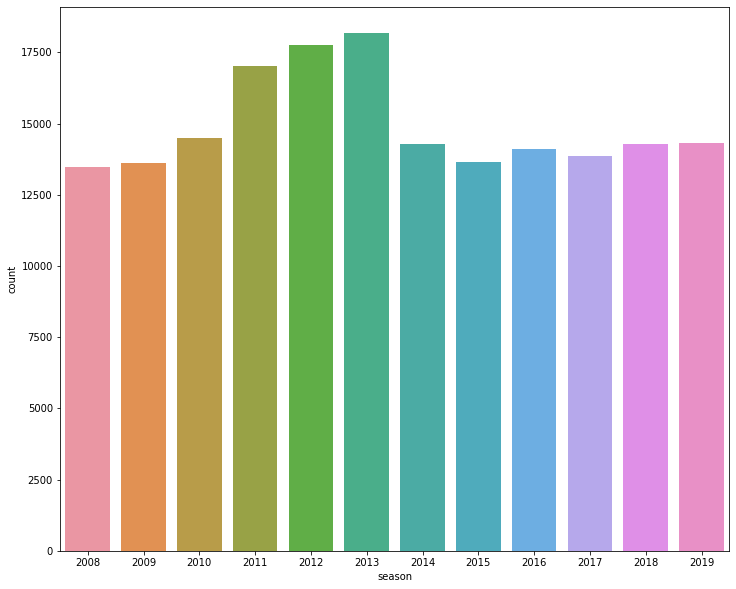

In [14]:
plt.figure(figsize=(10,8))
plt.pie(df['season'].value_counts(),labels=df['season'].value_counts().index,autopct='%1.1f%%')
plt.title('Representation of Matches played in each season',fontsize=20)
plt.show()
plt.figure(figsize=(12,10))
sns.countplot(df['season'])

##### According to the observation most of the matches played in 2013

### Most played team

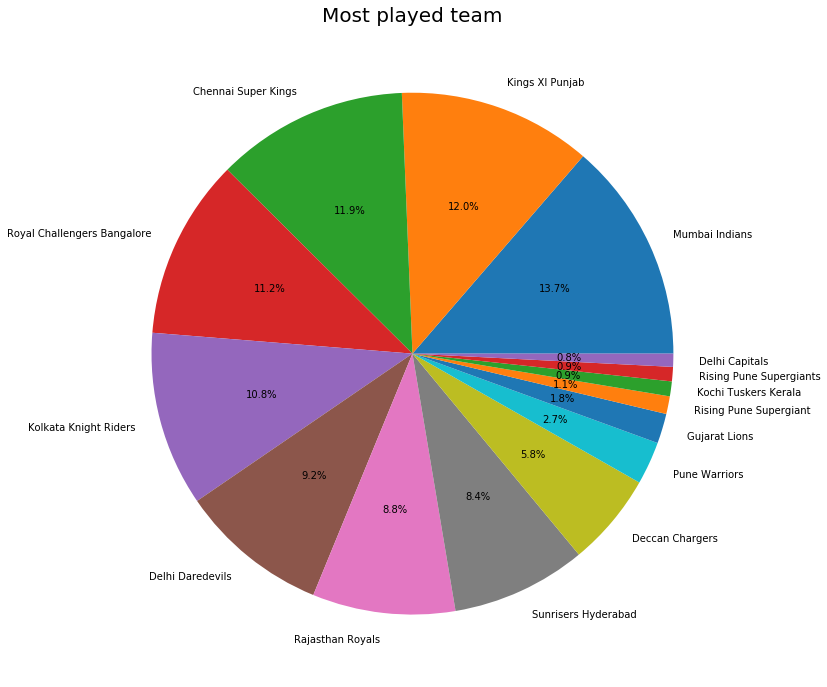

In [15]:
plt.figure(figsize=(15,12))
plt.pie(df['team1'].value_counts(),labels=df['team1'].value_counts().index,autopct='%1.1f%%')
plt.title('Most played team',fontsize=20)
plt.show()

##### Mumbai Indians is the most played team

#### Most team played in a season

Text(0, 0.5, 'Number of team')

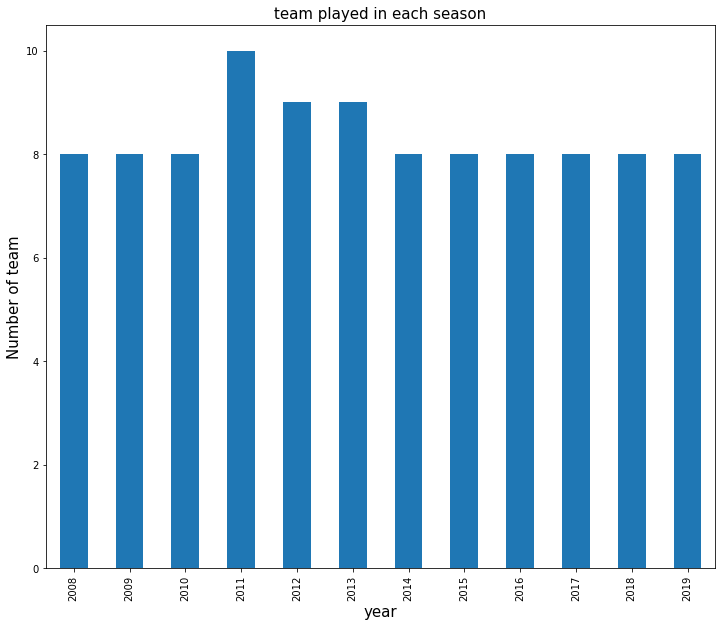

In [16]:
plt.figure(figsize=(12,10))
match.groupby('season')['team1'].nunique().plot(kind='bar')
plt.title('team played in each season',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('Number of team',fontsize=15)

#### 2011 is the most played season

### Number of stadiums in different cities 

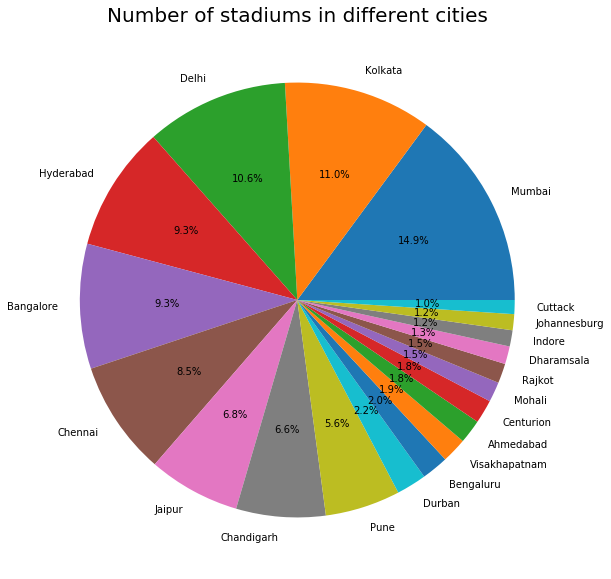

In [17]:
plt.figure(figsize=(12,10))
plt.pie(df['city'].value_counts()[:20],labels=df['city'].value_counts()[:20].index,autopct='%1.1f%%')
plt.title('Number of stadiums in different cities',fontsize=20)
plt.show()

##### Mumbai  contains most number of the stadium

### Most hosting venue

Text(0, 0.5, 'Name of the stadiums')

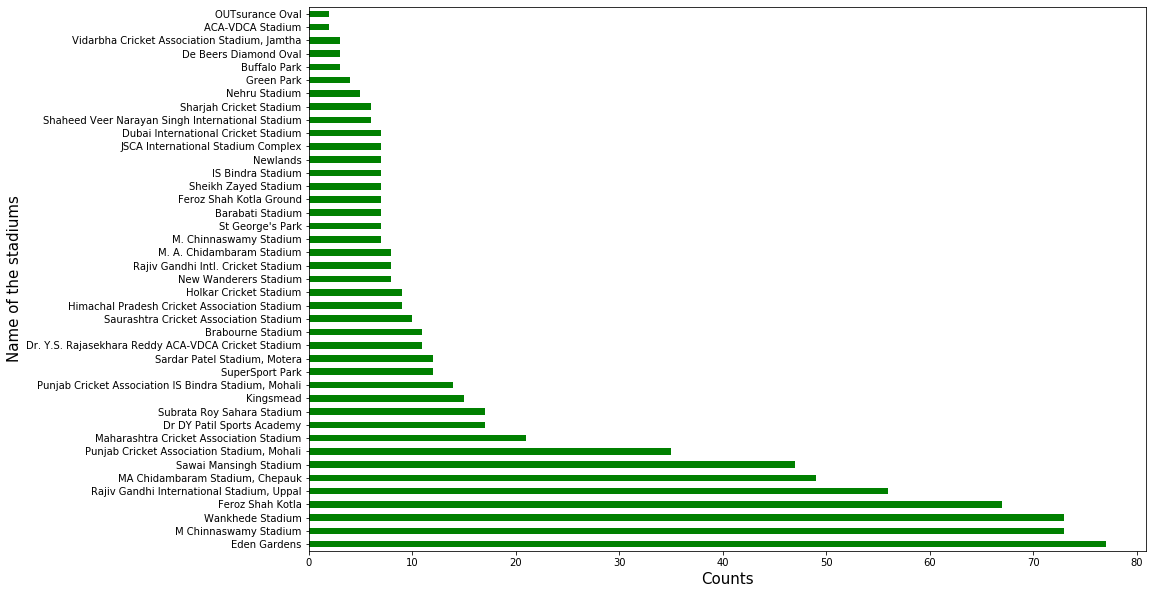

In [18]:
plt.figure(figsize=(15,10))
match['venue'].value_counts().plot(kind='barh',color='green')
plt.xlabel('Counts',fontsize=15)
plt.ylabel('Name of the stadiums',fontsize=15)

##### Eden Gardens is the most hosted venue

### The team wins most of the IPL matches

Text(0, 0.5, 'The team wins most IPL')

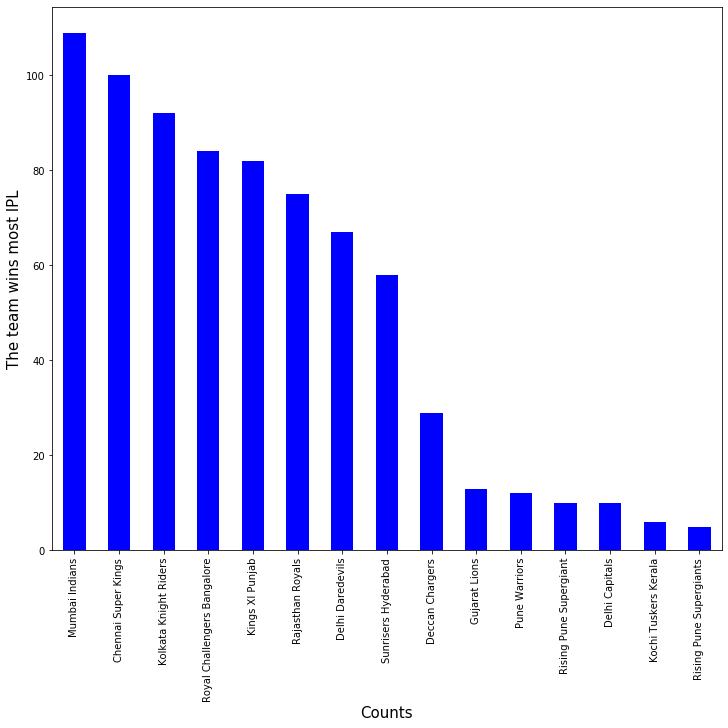

In [19]:
plt.figure(figsize=(12,10))
match['winner'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Counts',fontsize=15)
plt.ylabel('The team wins most IPL',fontsize=15)

##### Mumbai Indians is the most winned team and Chennai Super Kings is the second most winned team in IPL 


### Toss Preferences of the most team after winning the Toss

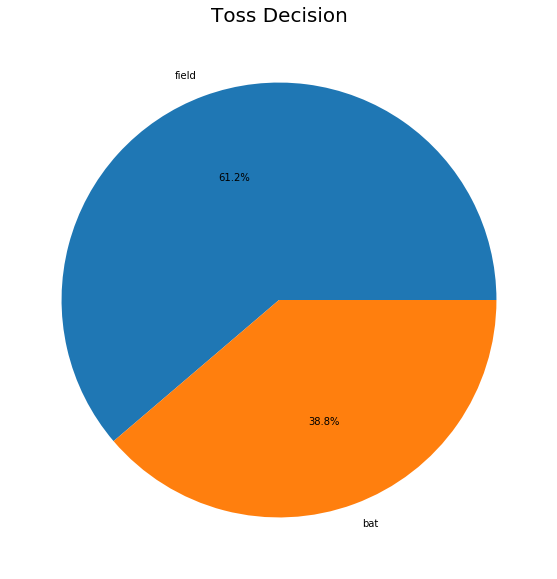

In [20]:
plt.figure(figsize=(12,10))
plt.pie(match['toss_decision'].value_counts(),labels=df['toss_decision'].value_counts().index,autopct='%1.1f%%')
plt.title('Toss Decision',fontsize=20)
plt.show()

##### More than 60% of the team choose fielding after winning toss

### How toss decision affects match results?

Text(0, 0.5, 'Count')

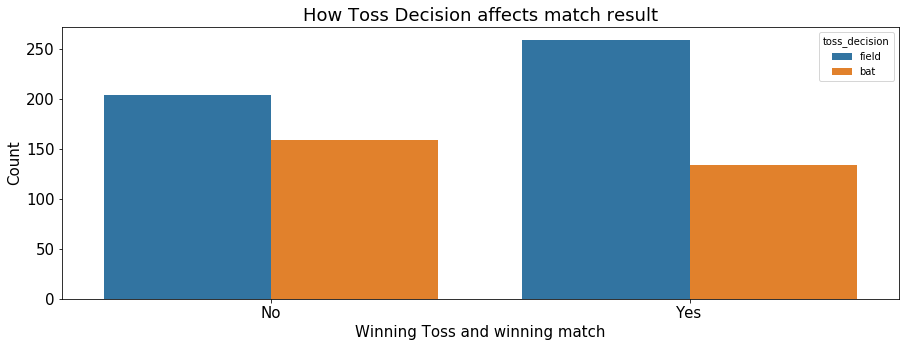

In [21]:
match['toss_win_game_win'] = np.where((match.toss_winner == match.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=match, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

##### After winning toss and chosiing fielding shows a good impact on match winning

### Individual team decision for choosing fielding or batting 

Text(0, 0.5, 'Count')

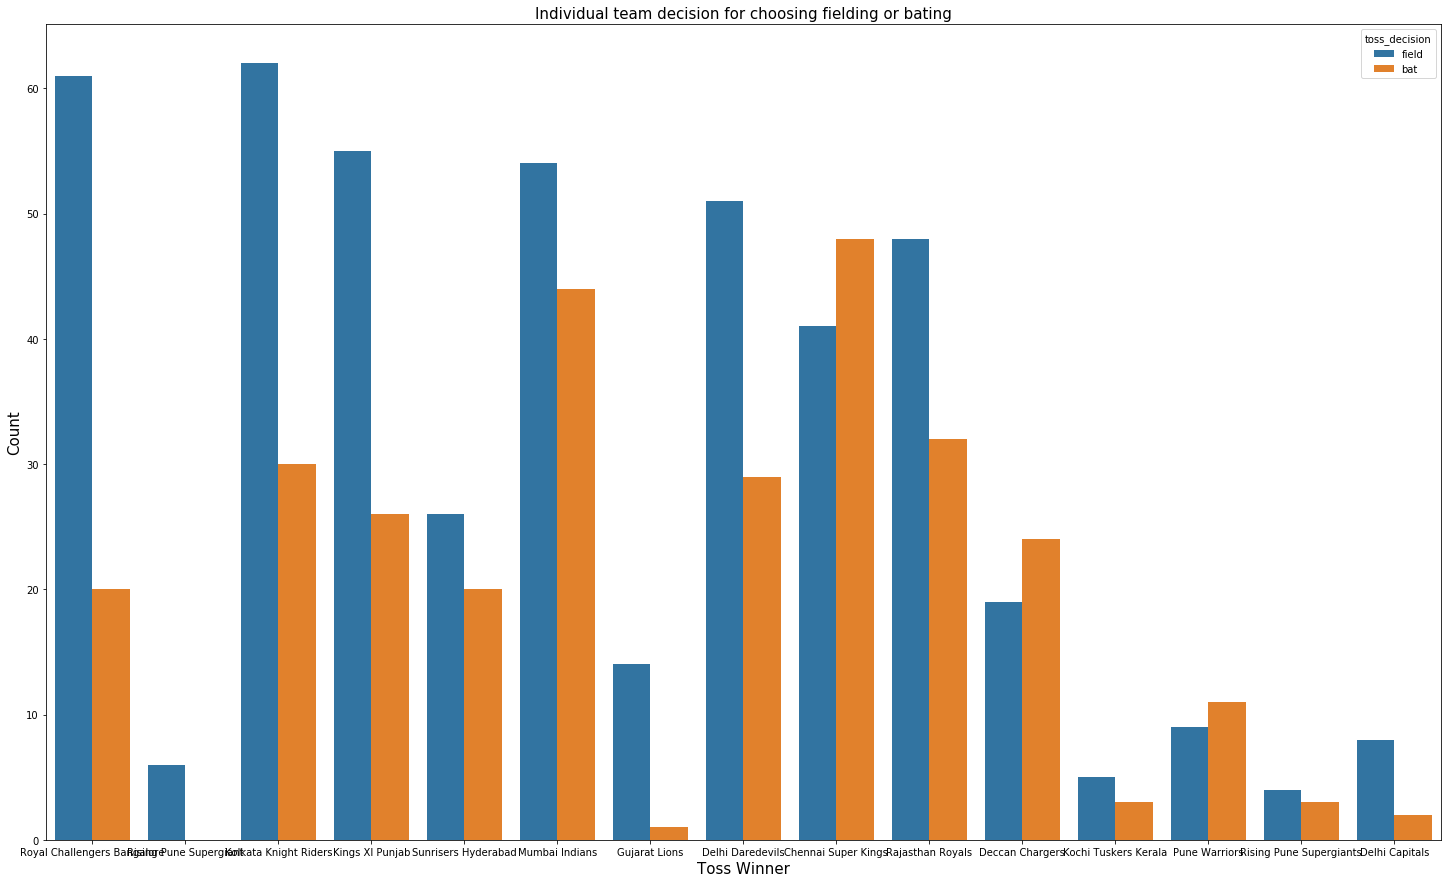

In [22]:
plt.figure(figsize=(25,15))
sns.countplot('toss_winner',hue='toss_decision',data=match)
plt.title('Individual team decision for choosing fielding or bating',fontsize=15)
plt.xlabel('Toss Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)

##### 'Chennai Super Kings','Deccan Chargers' and 'Pune Warriors' are the only three team that chooses batting after winning a toss ;the rest of the team choose fielding

### Who is the most winner for  player of the match?

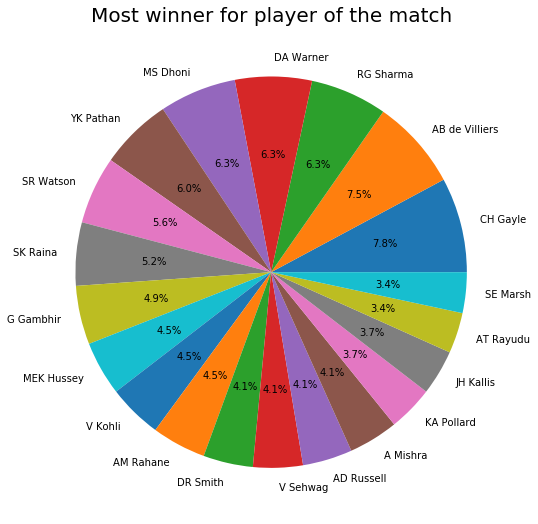

In [23]:
plt.figure(figsize=(12,9))
plt.pie(match['player_of_match'].value_counts()[:20],labels=match['player_of_match'].value_counts()[:20].index,autopct='%1.1f%%')
plt.title('Most winner for player of the match',fontsize=20)
plt.show()

##### CH Gayle is the most number of  'player of match' winner

### Winning matches by fielding first varies across all the venue

C:\Users\Trisha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Venue')

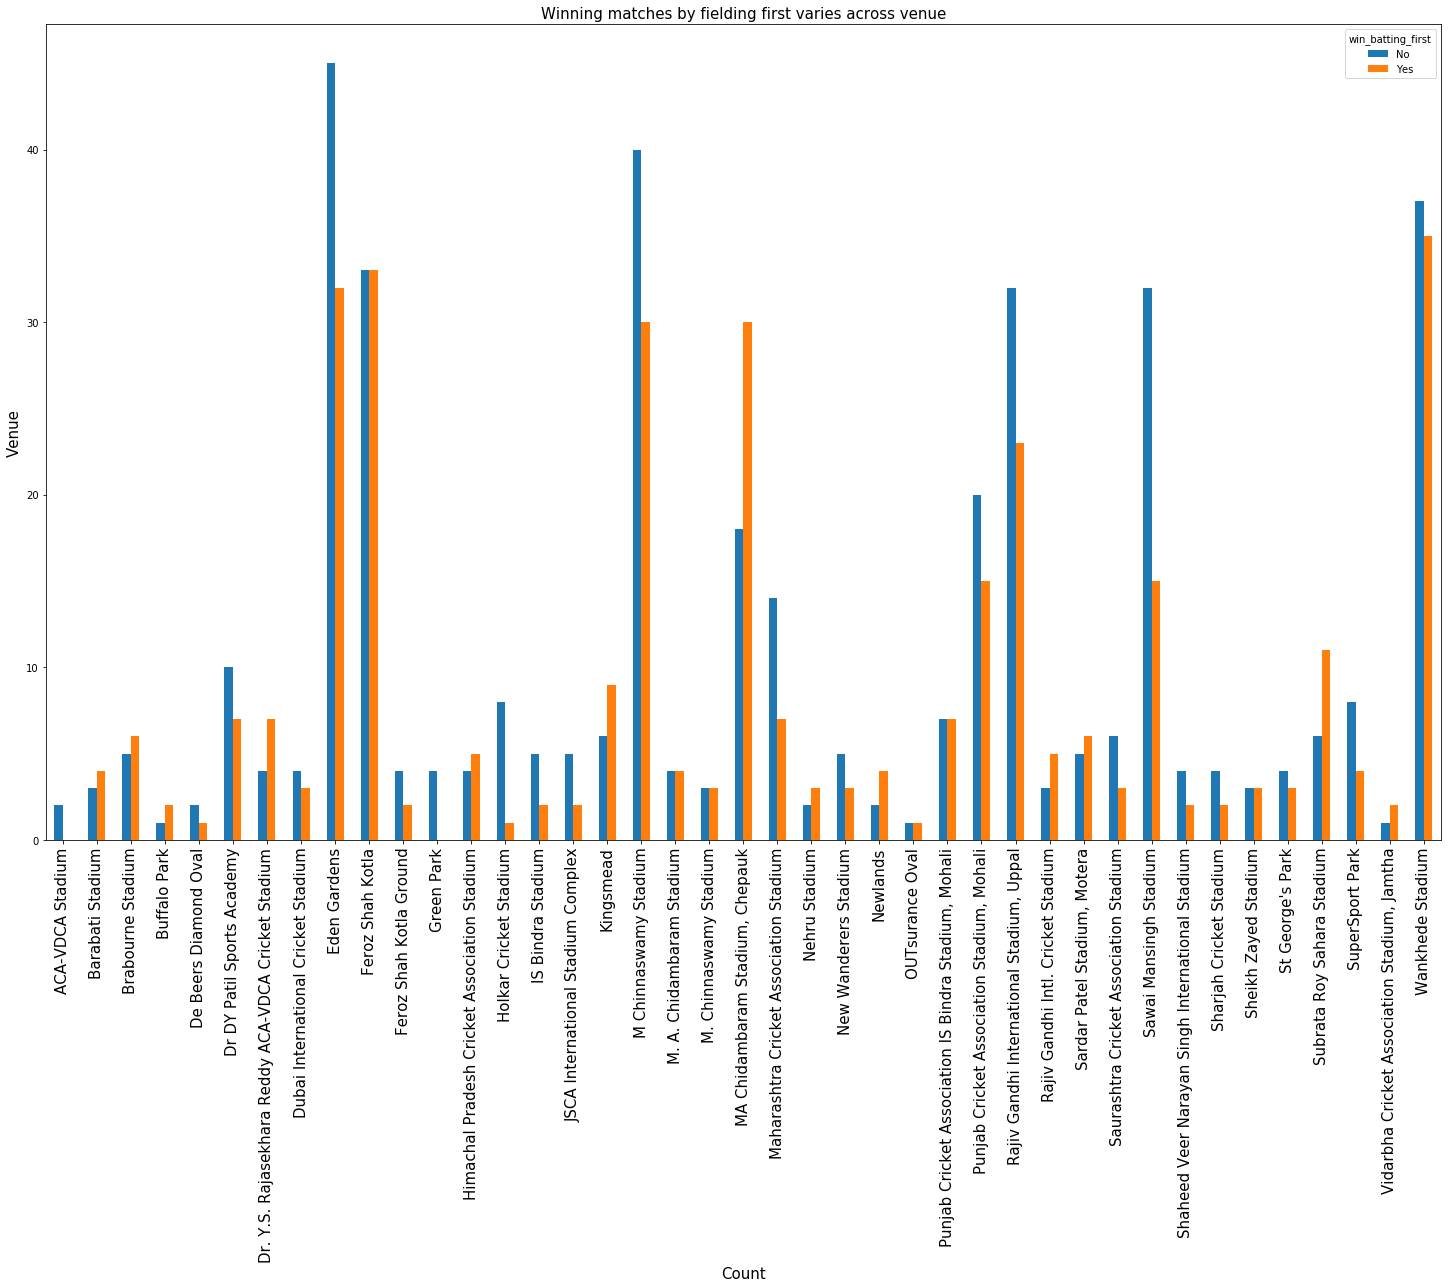

In [24]:
new_data = match[match['result'] == 'normal']
new_data['win_batting_first'] = np.where((new_data['win_by_runs'] > 0), 'Yes', 'No')
new_data.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'bar',figsize=(25,15))
plt.title("Winning matches by fielding first varies across venue", fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Venue", fontsize = 15)

##### So,fielding first shows the maximum rate of match winning in most of the venue

### Is fIelding first is benifical across all years

Text(0, 0.5, 'Count')

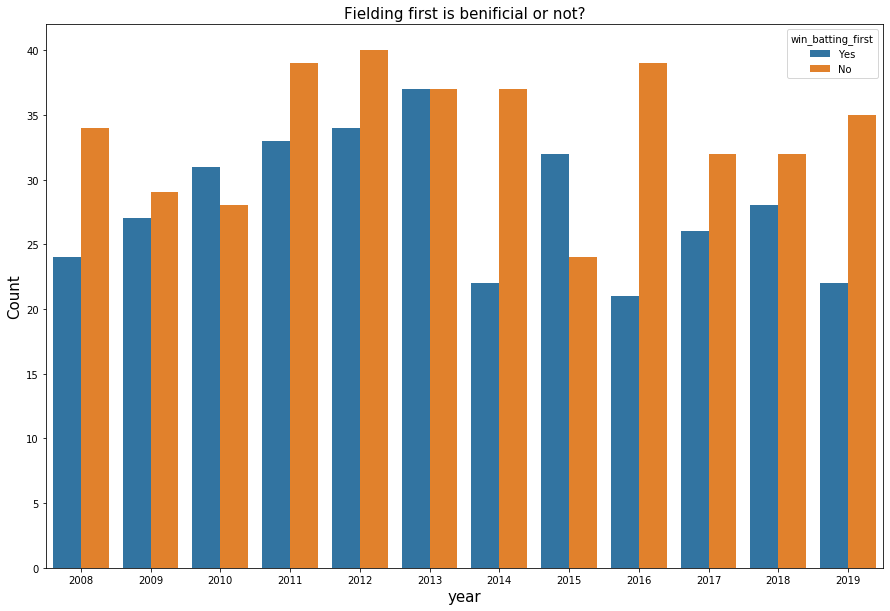

In [25]:
plt.figure(figsize=(15,10))
sns.countplot('season',data=new_data,hue='win_batting_first')
plt.title('Fielding first is benificial or not?',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('Count',fontsize=15)

##### According to the data, most of the year batting choosing for the second innings shows more winning rate

### Run scoring over the year

Text(0, 0.5, 'Run')

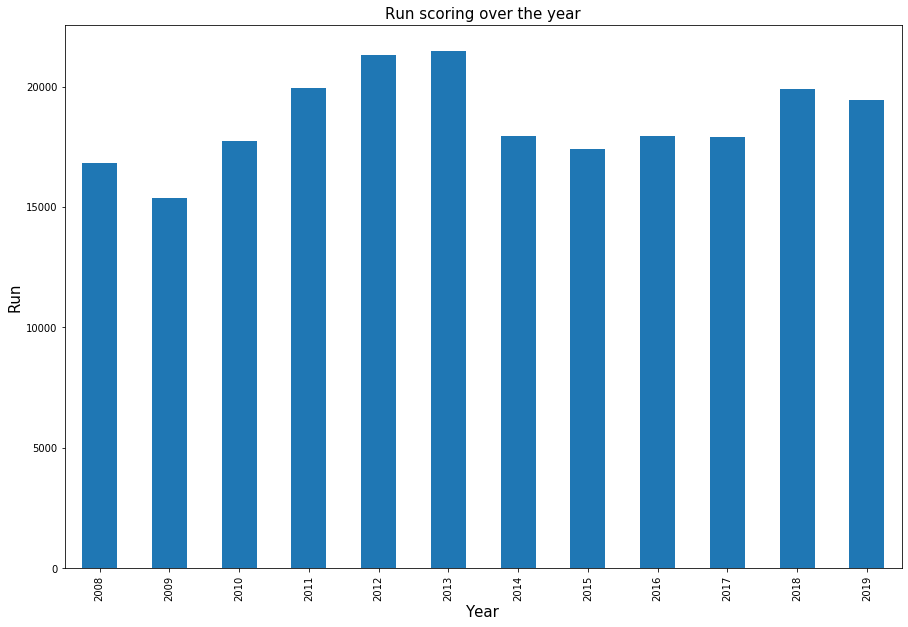

In [26]:
plt.figure(figsize=(15,10))
df.groupby('season')['batsman_runs'].sum().plot(kind='bar')
plt.title('Run scoring over the year',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Run',fontsize=15)

##### The lowest scored run was in 2009 and this rate has consistantly increased after 2009

### Which player gain the most run

Text(0, 0.5, 'Runs')

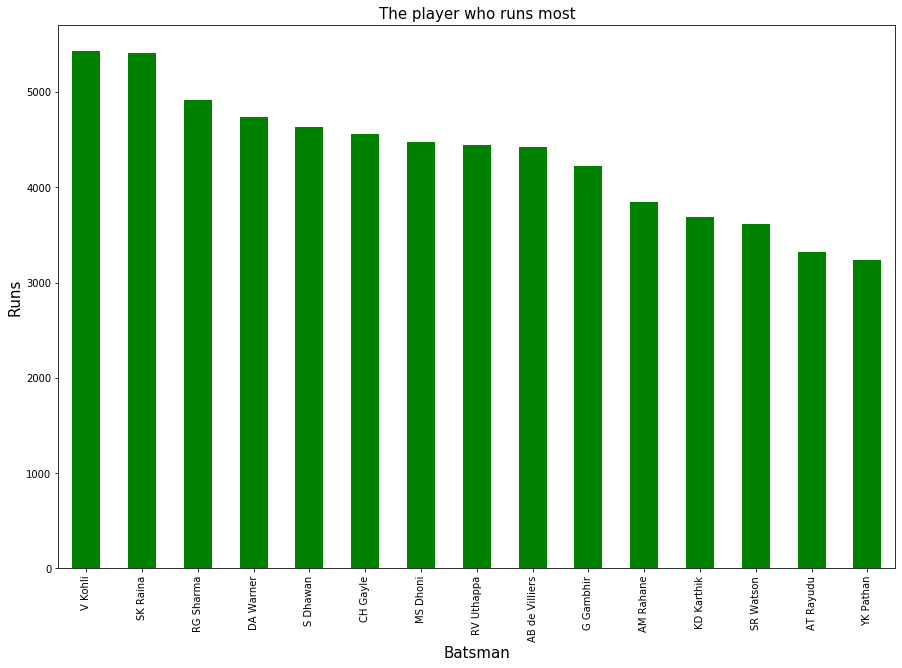

In [27]:
plt.figure(figsize=(15,10))
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(15).plot(kind = 'bar', color = 'green')
plt.title('The player who runs most',fontsize=15)
plt.xlabel('Batsman',fontsize=15)
plt.ylabel('Runs',fontsize=15)

### Bowler who performs good in IPL

Text(0, 0.5, 'Taken wicket')

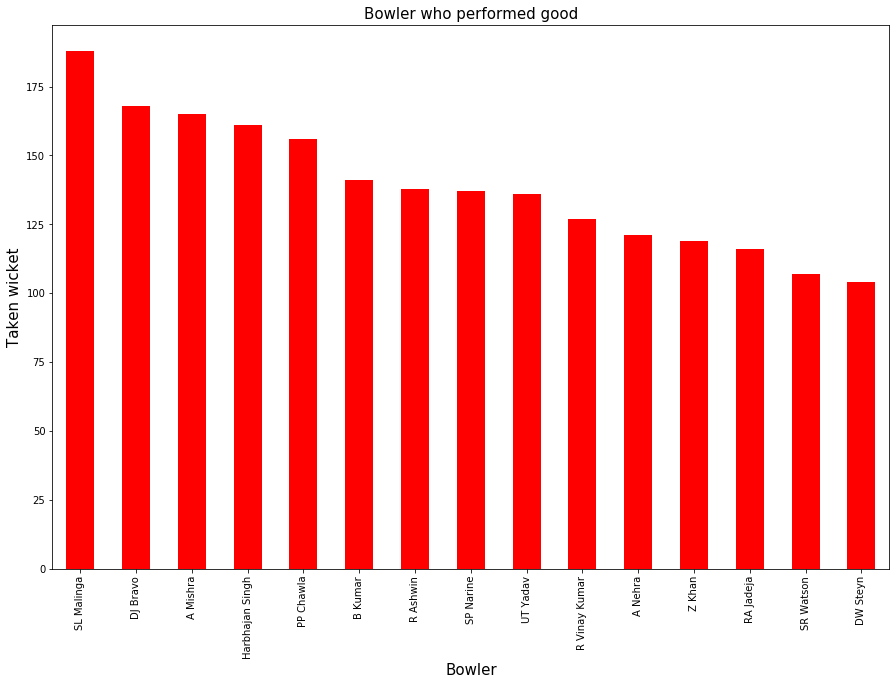

In [28]:
plt.figure(figsize=(15,10))
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(15).plot(kind='bar',color='red')
plt.title('Bowler who performed good',fontsize=15)
plt.xlabel('Bowler',fontsize=15)
plt.ylabel('Taken wicket',fontsize=15)

##### SL Malinga has taken most number of wicket in IPL

### Batsman with the most strike rate

In [29]:
no_of_balls = pd.DataFrame(df.groupby('batsman')['ball'].count())
runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(df.groupby('batsman')['season'].nunique()) 
batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)
batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',ascending = False)
highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


### Highest Strike rates in IPL

Text(0, 0.5, 'Strike Rate')

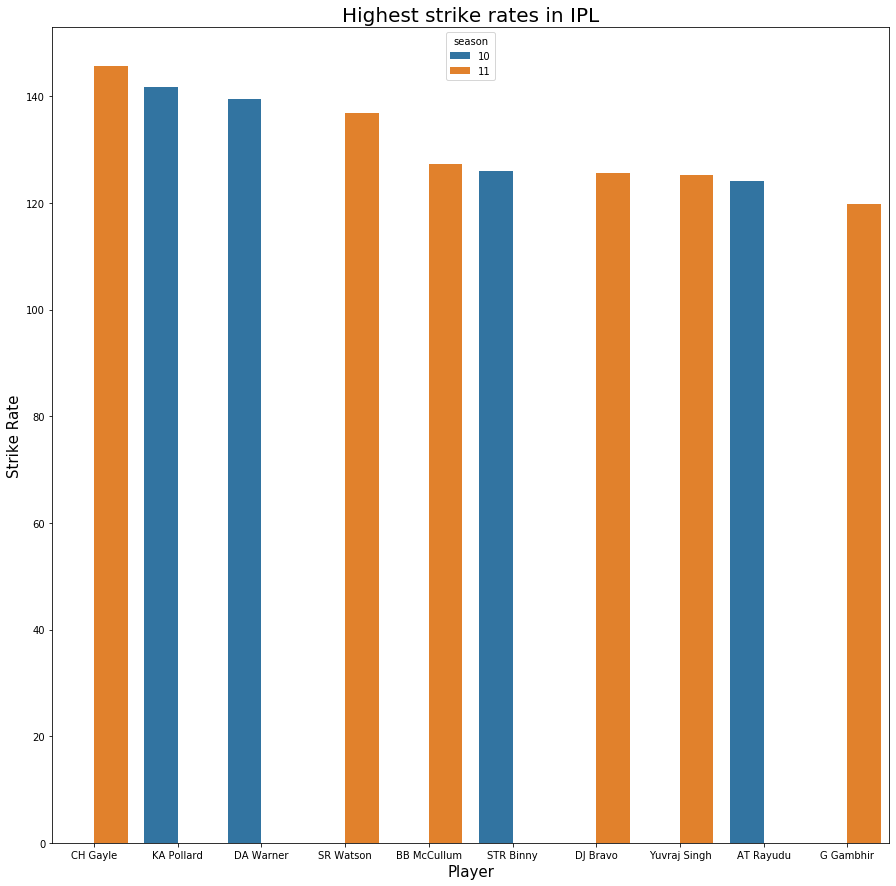

In [30]:
plt.figure(figsize = (15,15))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 20)
plt.xlabel("Player", size = 15)
plt.ylabel("Strike Rate", size = 15)

##### CH Gayle has the most strike rate than others player

### Which bowlers have picked up more wickets

In [31]:
balls_bowled = pd.DataFrame(df.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(df[df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(df.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [40]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


## As a sport analysts,the most successful teams,players & factors contributing win or loss of a team

#### According to the observation ,Mumbai Indians is the most successful team in IPL and wins most number of trophys.

#### Mumbai City has hosted most number of IPL matches
#### Chris Gayle has won the maximum number of 'Player of the Match' honor.
#### Eden Gardens has hosted the maximum number of IPL matches.
#### After winning the toss if the team choose to field first, then it increases the rate for winning the match.

##  Teams or Players a company should endorse for its products.

#### If the company is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner and others

#### When the company is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni or others on that category.
#### When the franchise is looking for a batsman for scoring good amount of runs every match theyshould go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan.
#### If the company needs a experienced bowler then they should seek for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo.
#### When the franchise needs a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla.